In [13]:
#imporing library
import numpy as np
import pandas as pd
import re
import emoji
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [14]:
#importing the dataset
df=pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [15]:
confidence_threshold=0.6
df.drop(df.query('airline_sentiment_confidence<@confidence_threshold').index,axis=0,inplace=True)

In [16]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [23]:
#concating two column 
tweet_df=pd.concat([df['text'],df['airline_sentiment']],axis=1)

In [30]:
tweet_df['text']

0                      @VirginAmerica What @dhepburn said.
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
                               ...                        
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14402, dtype: object

In [25]:
#checking for null values
tweet_df.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

In [26]:

df['airline_sentiment'].value_counts()

negative    9113
neutral     2997
positive    2292
Name: airline_sentiment, dtype: int64

In [27]:
#encoding 
sentiment_ordering=['negative','neutral','positive']
tweet_df['airline_sentiment']=tweet_df['airline_sentiment'].apply(lambda x:sentiment_ordering.index(x))

In [29]:
tweet_df['airline_sentiment'].value_counts()

0    9113
1    2997
2    2292
Name: airline_sentiment, dtype: int64

In [33]:
#creating function to process tweet
ps=PorterStemmer()

def process_tweet(tweet):
    new_tweet=tweet.lower()
    new_tweet=re.sub(r"@\w+",'',new_tweet)
    new_tweet=re.sub(r'@','',new_tweet)
    new_tweet=re.sub(r':',' ',emoji.demojize(new_tweet))
    new_tweet=re.sub(r'http\S+','',new_tweet)
    new_tweet=re.sub(r'\$\$+','dollar',new_tweet)
    new_tweet=re.sub(r'[^a-z0-9\s]','',new_tweet)
    new_tweet=re.sub(r'[0-9]+','number',new_tweet)
    new_tweet=new_tweet.split(' ')
    new_tweet=list(map(lambda x:ps.stem(x),new_tweet))
    new_tweet=list(map(lambda x:x.strip(),new_tweet))
    if '' in new_tweet:
        new_tweet.remove('')
    return new_tweet

In [37]:
tweets=tweet_df['text'].apply(process_tweet)
tweets

0                                           [what, , said]
2        [i, didnt, today, must, mean, i, need, to, tak...
3        [it, realli, aggress, to, blast, obnoxi, enter...
4         [and, it, a, realli, big, bad, thing, about, it]
5        [serious, would, pay, number, a, flight, for, ...
                               ...                        
14634           [right, on, cue, with, the, delay, hand, ]
14636    [leav, over, number, minut, late, flight, no, ...
14637    [pleas, bring, american, airlin, to, blackberr...
14638    [you, have, my, money, you, chang, my, flight,...
14639    [we, have, number, ppl, so, we, need, number, ...
Name: text, Length: 14402, dtype: object

In [36]:
labels=np.array(tweet_df['airline_sentiment'])
labels

array([1, 1, 0, ..., 1, 0, 1])

In [40]:
#getting size of vocabulary
vocabulary=set()
for tweet in tweets:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)
vocab_length=len(vocabulary)
max_seq_length=0
#get max length of a sequence
for tweet in tweets:
    if len(tweet)>max_seq_length:
        max_seq_length=len(tweet)
print('Vocab length',vocab_length)
print('Max_sequence_length',max_seq_length)

Vocab lenght 11260
Max_sequence_length 90


In [42]:
tokenizer=Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)
sequences=tokenizer.texts_to_sequences(tweets)
word_index=tokenizer.word_index
model_inputs=pad_sequences(sequences,maxlen=max_seq_length,padding='post')

In [43]:
sequences

[[49, 2, 217],
 [5, 190, 102, 743, 354, 5, 62, 1, 112, 150, 178],
 [15, 137, 2841, 1, 2010, 3425, 773, 14, 17, 1729, 998, 66, 59, 19, 475, 2197],
 [11, 15, 7, 137, 459, 212, 287, 85, 15],
 [417,
  78,
  201,
  4,
  7,
  6,
  9,
  83,
  20,
  190,
  19,
  29,
  4558,
  137,
  3,
  122,
  212,
  287,
  85,
  58,
  1535],
 [174, 1338, 306, 44, 5, 58, 1854, 29, 2447, 4559, 209, 67, 465, 2, 2],
 [137, 105, 7, 2448, 1395, 9, 2842, 326, 2198, 4560, 68, 2, 4561],
 [191, 5, 4562, 39, 5, 40, 2, 1396],
 [15, 23, 333, 11, 205, 42, 32, 349, 17, 176, 139, 1, 18],
 [124, 8, 109, 20, 2011, 13, 3, 505, 1284, 423, 16, 1285, 1469, 1855, 4],
 [5, 1132, 646, 3426, 47, 177, 216, 163, 4563, 4564, 2, 1396],
 [29,
  13,
  528,
  7,
  120,
  355,
  220,
  224,
  85,
  12,
  587,
  178,
  1,
  2,
  66,
  5,
  334,
  127,
  919,
  10,
  12,
  335,
  178,
  252,
  1628],
 [2,
  52,
  58,
  17,
  1629,
  4565,
  980,
  111,
  125,
  112,
  70,
  3,
  999,
  465,
  31,
  113,
  33,
  4566],
 [21],
 [4567, 350, 13, 7

In [45]:
word_index

{'to': 1,
 '': 2,
 'the': 3,
 'number': 4,
 'i': 5,
 'flight': 6,
 'a': 7,
 'you': 8,
 'for': 9,
 'on': 10,
 'and': 11,
 'my': 12,
 'is': 13,
 'in': 14,
 'it': 15,
 'of': 16,
 'your': 17,
 'me': 18,
 'have': 19,
 'that': 20,
 'thank': 21,
 'get': 22,
 'wa': 23,
 'not': 24,
 'with': 25,
 'at': 26,
 'no': 27,
 'be': 28,
 'thi': 29,
 'but': 30,
 'from': 31,
 'hour': 32,
 'http': 33,
 'can': 34,
 'are': 35,
 'cancel': 36,
 'we': 37,
 'help': 38,
 'now': 39,
 'do': 40,
 'servic': 41,
 'an': 42,
 'delay': 43,
 'time': 44,
 'just': 45,
 'custom': 46,
 'so': 47,
 'been': 48,
 'what': 49,
 'will': 50,
 'call': 51,
 'im': 52,
 'bag': 53,
 'wait': 54,
 'up': 55,
 'plane': 56,
 'out': 57,
 'fli': 58,
 'they': 59,
 'our': 60,
 'hold': 61,
 'need': 62,
 'us': 63,
 'when': 64,
 'how': 65,
 'amp': 66,
 'go': 67,
 'there': 68,
 'if': 69,
 'all': 70,
 'whi': 71,
 'cant': 72,
 'tri': 73,
 'still': 74,
 'one': 75,
 'pleas': 76,
 'airlin': 77,
 'would': 78,
 'day': 79,
 'gate': 80,
 'flightl': 81,
 'back':

In [46]:
model_inputs

array([[  49,    2,  217, ...,    0,    0,    0],
       [   5,  190,  102, ...,    0,    0,    0],
       [  15,  137, 2841, ...,    0,    0,    0],
       ...,
       [  76,  506,  434, ...,    0,    0,    0],
       [   8,   19,   12, ...,    0,    0,    0],
       [  37,   19,    4, ...,    0,    0,    0]], dtype=int32)

In [47]:
model_inputs.shape

(14402, 90)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(model_inputs,labels,train_size=0.7,random_state=22)

In [52]:
#Training
embedding_dim=32
inputs=tf.keras.Input(shape=(max_seq_length,))
embedding=tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length)(inputs)


2022-04-06 14:57:04.077661: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


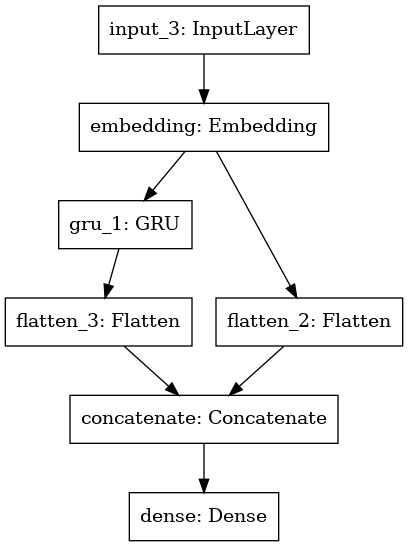

In [54]:
flatten=tf.keras.layers.Flatten()(embedding)
gru=tf.keras.layers.GRU(units=embedding_dim)(embedding)
gru_flatten=tf.keras.layers.Flatten()(gru)
concat=tf.keras.layers.concatenate([flatten,gru_flatten])
outputs=tf.keras.layers.Dense(3,activation='softmax')(concat)
model=tf.keras.Model(inputs,outputs)
tf.keras.utils.plot_model(model)



In [58]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
batch_size=32
epochs=100
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True,
                verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau()
    ])

Epoch 1/100
252/252 [==============================] - 27s 98ms/step - loss: 0.5323 - accuracy: 0.7919 - val_loss: 0.5492 - val_accuracy: 0.7828
Epoch 2/100
252/252 [==============================] - 24s 96ms/step - loss: 0.3925 - accuracy: 0.8616 - val_loss: 0.5128 - val_accuracy: 0.7997
Epoch 3/100
252/252 [==============================] - 26s 103ms/step - loss: 0.2949 - accuracy: 0.9018 - val_loss: 0.5063 - val_accuracy: 0.8052
Epoch 4/100
252/252 [==============================] - 27s 105ms/step - loss: 0.2236 - accuracy: 0.9294 - val_loss: 0.5112 - val_accuracy: 0.8007
Epoch 5/100
252/252 [==============================] - 27s 107ms/step - loss: 0.1686 - accuracy: 0.9544 - val_loss: 0.5272 - val_accuracy: 0.8007
Epoch 6/100
252/252 [==============================] - 25s 98ms/step - loss: 0.1275 - accuracy: 0.9683 - val_loss: 0.5478 - val_accuracy: 0.7952
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


  1/136 [..............................] - ETA: 11s - loss: 0.6026 - accuracy: 0.8438

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fee2e121710>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


136/136 [==============================] - 6s 44ms/step - loss: 0.4895 - accuracy: 0.8077


[0.48952120542526245, 0.8076834082603455]

In [64]:
model.evaluate(x_test,y_test)

136/136 [==============================] - 6s 44ms/step - loss: 0.4895 - accuracy: 0.8077


[0.48952120542526245, 0.8076834082603455]